# Introduction

Neural network algorithm has turned out to be a powerful machine learning tool to find patterns in a various kinds of data, such as texts, pictures, and even videos. Keras is a high-level neural network API for python that runs on Tensorflow, CNTL or Theano. It has encapsulated many widely-used neural network layer functions and data processing functions. With Keras, a practioner can build a customized neural network without knowing too much about the underlying theories.
We will go through using Keras to solve common natural language processing problems in data science. More specifically, we will cover the following topics in this tutorial:
- [Installing the required libraries](#Installing-the-required-libraries)
- [A simple introduction to neural network](#A-simple-introduction-to-neural-network)
- [Application 1: Spam filtering with Keras](#Application-1:-Spam-filtering-with-Keras)
 - [Prepare text data in Keras](#Prepare-text-data-in-Keras)
 - [Build a simple network with Keras](#Build-a-simple-network-with-Keras)
 - [Train the model](#Train-the-model)
 - [Save models and evaluate](#Save-models-and-evaluate)
- [Application 2: Stock analysis with Keras](#Application-2:-Stock-analysis-with-Keras)
 - [Prepare stock data](#Prepare-stock-data)
 - [Build the GRU network](#Build-the-GRU-network)
 - [Train GRU model](#Train-GRU-model)
 - [Validate the model](#Validate-the-model)
- [References](#References)

# Installing the required libraries

Here, we will go through the steps to install and use Keras in your conda environment.

Firstly, install the tensorflow engine in your anoconda environment:

(1) Create a conda environment named tensorflow by invoking:

```$ conda create -n tensorflow pip python=your_python_version```

(2) Activate the conda environment and install Tensorflow using pip

```$ source activate tensorflow```

```$ pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.6.0-py3-none-any.whl (Use this if you're using python 3.x)```

```$ pip install --ignore-installed --upgrade https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.6.0-py2-none-any.whl (Use this if you're using python 2.x)```

(3) Execute the following command to resolve additional package dependencies:

```$ conda install notebook```

(4) Install Keras:

```$ conda install -c conda-forge keras```

(5) Install the following libraries for visualizing the network model

```$ conda install pydot```

```$ conda install graphviz```

There we go! Now you should be able to use Keras in Jupyter notebook.

# A simple introduction to neural network

Currently, there are already many existing libraries like Keras that we can use without knowing the underlying theory, but it can be good for you to know a little bit of how neural network works before you lay hands on the libraries.

The basic unit of a neural network is called a neuron. It receives the input data and apply some function, which we usually call activation function, to the input data and output the result. The picture is from [here](https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc).

<img src='pictures/neuron.gif'>

Usually, a neural network can have many layers, each with many neurons. A very classic neural network is a fully connected network, in which each neuron in one layer is connected to all the neurons in the following layer. 

When you input your data into the neural network, each neuron in the input layer will receive your data and apply the activation function to it, such as softmax or tanh, to produce an output and feed the output to all the neurons in the next layer. Then each neuron in the next layer will receive all the outputs from all neurons from the previous layer and do the same thing.

The neural network use gradient descent algorithm to perform optimization of the model. Gradient descent is a way to minimize an objective function parameterized by a model's parameters by updating the parameters in the opposite direction of the gradient of the objective function to the parameters. When the network model outputs the final result from the input data, it will calculate the lossand propagate the loss back to the network. Then each neuron will update its weights and bias of its activation function. You can regard this process as a feedback to the network so that the netowrk could learn from the loss and try to give more accurate predictions netxt time.

If you want to know more details about neural networks, [blogs by Michael Nielsen](http://neuralnetworksanddeeplearning.com/index.html) are awesome materials.

# Application 1: Spam filtering with Keras

In this example, we will use Keras to solve a classic NLP problem. a spam classification example. The data we'll use here is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).
SMS (Short Message Service) is a text messaging service component of most telephone, World Wide Web, and mobile device systems. SMS spam is a common form of spam, include unsolicited messages or advertising.

We will build a simple neural network using Keras to filter spam frm our messages. The data set used to train the model is from the UCI SMS Spam Collection Data Set. The data is stored in a .txt file, in which each row of the text containing two attributes: the tag and the text.

## Prepare text data in Keras

Firstly, we need to separate the tag of each SMS message from the text. We transform labels to integer, so that they can be used in neural network.

In [2]:
spam_path = 'SMS/SMSSpamCollection.txt'

tags = []
sms = []

# separate the tags from the text
with open(spam_path, 'r') as spam_file:
    for line in spam_file:
        if line.split('\t', 1)[0] == 'spam':
            tags.append(1)
        else:
            tags.append(0)
        sms.append(line.split('\t', 1)[1])

print('--------------------Sample Data--------------------')
for tag, text in zip(tags[:5], sms[:5]):
    print("Label:", tag, " Text:", text)

--------------------Sample Data--------------------
Label: 0  Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Label: 0  Text: Ok lar... Joking wif u oni...

Label: 1  Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Label: 0  Text: U dun say so early hor... U c already then say...

Label: 0  Text: Nah I don't think he goes to usf, he lives around here though



Text processing is easy and straightforward in Keras. There are several methods provided by Keras. Below I will introduce my preferred approach.

For neural networks to work, text data must be encoded as numbers in order to be used as input. Keras provides the Tokenizer class for preparing text documents for deep learning. Below is a simple example of text processing in Keras:

In [3]:
from keras.preprocessing.text import Tokenizer

# define 5 documents
docs = ['At last we have found out the truth',
		'Well done!',
		'This seems an accident',
		'Nothing in the woods',
		'Wee need to tell others.']
# create the tokenizer
t = Tokenizer(num_words=None,
              filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
              lower=True)
# fit the tokenizer on the documents
t.fit_on_texts(docs)

# summarize what was learned
print('--------------------Word Counts--------------------')
print(t.word_counts) # a dictionary of words and their frequencies in the collections
print("print('--------------------Word Index--------------------')")
print(t.word_index) # t.word_index is a dict in which key is a word and value is its unique index
print('--------------------Document frequency--------------------')
print(t.word_docs) #  t.word_docs is the a dict of words and their document frequency
print('--------------------Document Number--------------------')
print(t.document_count) # t.document_count is the total number of documents processed

--------------------Word Counts--------------------
OrderedDict([('at', 1), ('last', 1), ('we', 1), ('have', 1), ('found', 1), ('out', 1), ('the', 2), ('truth', 1), ('well', 1), ('done', 1), ('this', 1), ('seems', 1), ('an', 1), ('accident', 1), ('nothing', 1), ('in', 1), ('woods', 1), ('wee', 1), ('need', 1), ('to', 1), ('tell', 1), ('others', 1)])
print('--------------------Word Index--------------------')
{'the': 1, 'at': 2, 'last': 3, 'we': 4, 'have': 5, 'found': 6, 'out': 7, 'truth': 8, 'well': 9, 'done': 10, 'this': 11, 'seems': 12, 'an': 13, 'accident': 14, 'nothing': 15, 'in': 16, 'woods': 17, 'wee': 18, 'need': 19, 'to': 20, 'tell': 21, 'others': 22}
--------------------Document frequency--------------------
{'found': 1, 'have': 1, 'truth': 1, 'at': 1, 'the': 2, 'out': 1, 'last': 1, 'we': 1, 'done': 1, 'well': 1, 'seems': 1, 'accident': 1, 'an': 1, 'this': 1, 'woods': 1, 'nothing': 1, 'in': 1, 'others': 1, 'to': 1, 'tell': 1, 'need': 1, 'wee': 1}
--------------------Document N

After the tokenizer has been fit on the training set, it could be used to encode text samples in other data sets. The texts_to_matrix() function on the Tokenizer can be used to create one feature vector per document provided per input. The length of the vectors is the total size of the vocabulary. 

In [4]:
matrix = t.texts_to_matrix(docs, mode='count')
print(matrix)

[[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]


Now, we use similar methods to process our text data in the spam collection. The difference is that we will additionally use NLTK to remove the stop words from our text data. There are a total of 5574 data samples in the whole collection. We choose the first 4000 samples for training, and the rest for validation. We will firstly use the Keras tokenizer on the sample text to gain the statistic information about the data set, such as the vocabulary size. Then we will encode each word as an integer and prepare the data for Word Embedding. I'll explain what is Word Embedding later in this tutorial.

In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.sparse import csr_matrix
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

# filter the stop words from each data sample
stop_words = set(stopwords.words('english'))
max_length = 0

for index, text in enumerate(sms):
    text = text.lower()
    word_tokens = word_tokenize(text)
    word_tokens = [w for w in word_tokens if not w in stop_words]
    max_length = max(max_length, len(word_tokens))
    sms[index] = ' '.join(word_tokens)

# use the tokenizer to gain statistic information
tokenizer = Tokenizer(num_words=None,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True)
# fit the tokenizer on the documents
tokenizer.fit_on_texts(sms)
vocab_size = len(tokenizer.word_counts)
    
# choose the training data set and validation data set
train_tags = tags[:4000]
train_sms = sms[:4000]
valid_tags = tags[4000:]
valid_sms = sms[4000:]

# encode the words into integers
encoded_train_sms = [one_hot(sms, vocab_size) for sms in train_sms]
encoded_valid_sms = [one_hot(sms, vocab_size) for sms in valid_sms]

# The neural network require the input data to be of the same shape
# we pad each sequence so that they will have the length as the longest string
padded_train_sms = pad_sequences(encoded_train_sms, maxlen=max_length)
padded_valid_sms = pad_sequences(encoded_valid_sms, maxlen=max_length)
print("Done")

Done


## Build a simple network with Keras

Building a neural network using Keras is partucularly easy when compared with other frameworks such as Theano. In Keras, a neural network starts from a **model** data structure. Then, adding layers is as simple as calling the **add( )** function. Let me demonstrate this using a simple example.

Firstly, we need to create a model. Because our net in this example is relatively simple, a sequential model will suffice.

In [6]:
from keras.models import Sequential

model = Sequential()

Then, we firstly add the **Embedding** layer as our input part. This layer provides a better representation of text feature vectors than the sparse representation. For simplicity, you can regard the function of this layer similar to Word2Vec, which can learn some context information about each word.
Then, we can add the different layers by simply calling the **add( )** function. **Flatten** layer is used to flatten the output from the **Embedding** layer.The **Dense** layer perfors the fully-connected operation. We can set the number of neurons at this layer.
The **Dropout** layer is used to prevent the model we learn from overfitting. This layer works in the way in which every time a data sample is input into the network, 30% of the neurons will be deactivated and only the rest 70% neurons will process input data.

In [7]:
from keras.layers import Dense, Activation, Dropout, Embedding, Flatten
from keras.utils import plot_model
from keras import backend

model.add(Embedding(vocab_size, 250, input_length=max_length))
model.add(Flatten())
model.add(Dense(256, activation=backend.relu))
# model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation=backend.relu))
# model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation=backend.relu))
# model.add(Activation('relu'))
model.add(Dropout(0.3))
# print out the network architecture
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 202, 250)          2198750   
_________________________________________________________________
flatten_1 (Flatten)          (None, 50500)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               12928256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
__________

Since we have the input layer, we should also have an output layer in our network. To achieve this output the layer will use the Softmax activation function.

In [8]:
num_labels = 2

model.add(Dense(num_labels))
model.add(Activation('softmax'))

At this point, we have finished the network building process. If you build some very complex model, the stack-style layout of different layers may not be so vivid to watch. Fortunately, we could use the following function to get a better representation of our model structure.

In [11]:
# Use this to visualize your network structure in picture
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

<img src='pictures/model.png'>

## Train the model

To prepare our model for training, we need to call the compile method with the loss function we want to use, the type of optimizer, and the metrics our model should evaluate during training and testing. We’ll use the cross entropy loss function, since each data sample can only belong to one category. The adam optimizer is also used here.

In [9]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Finally, we can just input our training data into the model.

In [10]:
import numpy as np
from keras.utils import to_categorical

# conver our tags to a vector
# In our example, if we have two labels: 0 and 1
# Then the two labels will be transformed to [1 0] and [0 1]
train_tags = to_categorical(train_tags)

batch_size = 32
train_tags = np.array(train_tags)

valid_tags = to_categorical(valid_tags)
valid_tags = np.array(valid_tags)

# epochs: the number of times the algorithm being trained on the entire data set
model.fit(padded_train_sms,
          train_tags,
          epochs=4,
          verbose=1)

Epoch 1/4
4000/4000 [==============================] - 32s 8ms/step - loss: 0.2540 - acc: 0.9087
Epoch 2/4
4000/4000 [==============================] - 30s 7ms/step - loss: 0.0332 - acc: 0.9928
Epoch 3/4
4000/4000 [==============================] - 30s 7ms/step - loss: 0.0076 - acc: 0.9982
Epoch 4/4
4000/4000 [==============================] - 30s 7ms/step - loss: 0.0035 - acc: 0.9993


## Save models and evaluate

After we trained our model on the available data set, we could save our model to a HDF5 file for future use. For example, if at some point we want to reuse the old model to predict on the new data, we can simply reload the model to memory.

In [11]:
from keras.models import load_model

# save the model to disk
model.save('spam_classification.h5')
print("-----Save done-----")

# reload the model into memory
model = load_model('spam_classification.h5')
print("-----Reload again-----")

-----Save done-----
-----Reload again-----


In [12]:
classes = model.predict(padded_valid_sms, batch_size=batch_size)
print('Our predictions: ', classes)

# calculate the model accuracy on the validation data sets
accuracy = 0.0

predict_tags = []
for prediction in classes:
    if prediction[0] > prediction[1]:
        predict_tags.append(0)
    else:
        predict_tags.append(1)

# reverse the to_categorical effect
valid_tags = np.argmax(valid_tags, axis=1)      

count = 0
for index, predict_tag in enumerate(predict_tags):
    if predict_tag == valid_tags[index]:
        count+=1
print("accuracy of the model on the validation data set: ", count / len(predict_tags))

Our predictions:  [[9.9999619e-01 3.8648463e-06]
 [4.1719060e-05 9.9995828e-01]
 [9.9999702e-01 3.0028573e-06]
 ...
 [9.9306279e-01 6.9372156e-03]
 [9.9994814e-01 5.1830531e-05]
 [9.9194020e-01 8.0597922e-03]]
accuracy of the model on the validation data set:  0.9853875476493011


# Application 2: Stock analysis with Keras

With regard to data with time sequencing properties, we usually need a network structure that is good at capturing the context and sequential information. Recurrent neural network is such kind of network that can help us. The unit of the recurrent neural network can be shown by the following picture (the picture is from [here](http://www.wildml.com/2015/09/recurrent-neural-networks-tutorial-part-1-introduction-to-rnns/)):

<img src="pictures/rnn.jpg">

To explain this picture, we can regard each input to the RNN unit as data at different time steps. For example, for the sales data of a company, x could be the sale of each month. The reasons why RNN is so good at capture the sequential learning is that it keeps the information it learnt from the previous time steps when processing the current input. We won't dive into the theory behind RNN too deep here. You can check this [post](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) for more details.

In this example, we will build a neural network to predict the open price of a stock using the data from the previous three days. And we will use GRU (Gated Recurrent Unit) network, which is a simplified version of LSTM with less parameters but still great power.

## Prepare stock data

The purpose of this neural network is to predict the current stock open price of one day using data from the previous N days. The data we'll use here comes from [Kaggle Huge Stock Market Dataset](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/data). We need to prepare our data before it can be input into the neural network.

In [21]:
import pandas as pd

# read the data from the txt as csv
stock_path = 'a.us.txt'
stocks = pd.read_csv(open(stock_path, "rb"), delimiter = ',')
print(stocks.head())

         Date    Open    High     Low   Close    Volume  OpenInt
0  1999-11-18  30.713  33.754  27.002  29.702  66277506        0
1  1999-11-19  28.986  29.027  26.872  27.257  16142920        0
2  1999-11-22  27.886  29.702  27.044  29.702   6970266        0
3  1999-11-23  28.688  29.446  27.002  27.002   6332082        0
4  1999-11-24  27.083  28.309  27.002  27.717   5132147        0


The mearning of each attribute is as follows:
* Open: The price of this stock at the begining of the day
* Low: The lowest price of this stock in the day
* Close:  The last price that a stock trades during the day
* Volumn: The number of shares or contracts traded during the day
* OpenInt: The open price of the next day

In [22]:
# prepare the data
stocks = stocks.set_index('Date')
# since the values of the OpenInt column are all 0, which is not helpful, we simply drop this column
stocks = stocks.drop(['OpenInt'], axis=1) # drop the date column
print(stocks.head())

              Open    High     Low   Close    Volume
Date                                                
1999-11-18  30.713  33.754  27.002  29.702  66277506
1999-11-19  28.986  29.027  26.872  27.257  16142920
1999-11-22  27.886  29.702  27.044  29.702   6970266
1999-11-23  28.688  29.446  27.002  27.002   6332082
1999-11-24  27.083  28.309  27.002  27.717   5132147


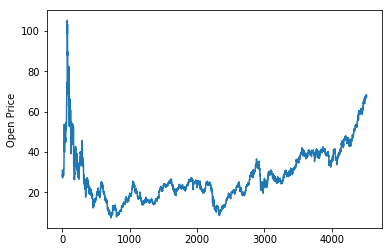

In [23]:
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
# visualize the overall trend of the open prices
values = stocks.values
pyplot.plot(values[:, 0])
pyplot.ylabel('Open Price')
pyplot.show()

# normalize the values to the range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

Next, we will group the stock data of adjacent three days as a sample and use the open price at the day following the previous three days as our label. Besides, we will also divide the data into train and test dataset.

In [24]:
import numpy as np

N = 3
num_rows = scaled_values.shape[0]

x = []
y = []
for i in range(num_rows - N):
    temp = []
    for j in range(N):
        temp.append(scaled_values[i + j])
    x.append(np.array(temp))
    y.append(scaled_values[i + N][0])

# get the training and test data
train_x = np.array(x[:3000])
train_y = np.array(y[:3000])
test_x = np.array(x[3000:])
test_y = np.array(y[3000:])

## Build the GRU network
Next, we will build the gru network for our application. We use adam optimization here, because adam is used to perform optimization and is said to be one of the best optimizer at presen. Besides, we use mean absolute error function as our loss in the model.

In [25]:
from keras.layers import GRU, Dense, Dropout
from keras.models import Sequential

n_batch = 8

model = Sequential()
model.add(GRU(1024, input_shape=(train_x.shape[1], train_x.shape[2]), return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(512))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# print out the network architecture
print('--------------------The Network Structure--------------------')
model.summary()
print('--------------------Shape of our training data--------------------')
print(train_x.shape)


--------------------The Network Structure--------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 3, 1024)           3164160   
_________________________________________________________________
dropout_6 (Dropout)          (None, 3, 1024)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 512)               2360832   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 5,525,505
Trainable params: 5,525,505
Non-trainable params: 0
_________________________________________________________________
--------------------Shape of our training data--------------------
(30

# Train GRU model

Now, let's train our model using the training dataset.

In [26]:
# train and evaluate
print(train_y)
model.fit(train_x, np.array(train_y), epochs=10, batch_size=n_batch)

[0.21885786 0.20249315 0.20770334 ... 0.18652608 0.20055589 0.20055589]
Epoch 1/10
3000/3000 [==============================] - 52s 17ms/step - loss: 0.0204
Epoch 2/10
3000/3000 [==============================] - 50s 17ms/step - loss: 0.0152
Epoch 3/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0126
Epoch 4/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0116
Epoch 5/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0101
Epoch 6/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0095
Epoch 7/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0094
Epoch 8/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0087
Epoch 9/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0091
Epoch 10/10
3000/3000 [==============================] - 49s 16ms/step - loss: 0.0091


## Validate the model

Now, we will choose the first three days of the test data set as our starting point, and then use our model to predict the open price of the following days.

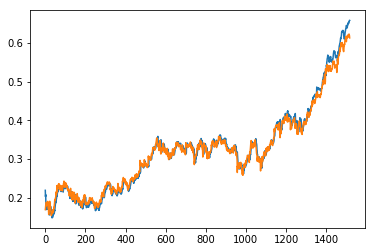

In [27]:
# generate the predictions and produce the result
test_rows = len(test_y)

predictions = list(train_y[:N])

for i in range(test_rows - N):
    test_input = []
    test_input.append(np.array(test_x[i]))
    test_input = np.array(test_input)
    prediction = model.predict(test_input)
    predictions.append(prediction[0][0])

# plot the graph for both the actual open prices and our predictions
pyplot.figure()
pyplot.plot(predictions)
pyplot.plot(test_y)
pyplot.show()

From the above graph, we could see that our predictions have almost the same trend as the actual data, which means that our model did well. Aside from the stock analysis, recurrent neural network is also often used in many natural language processing tasks, such as language translation or learning language model of a writer.

# References

You can more details of neural networks and Keras from the following links:
1. Keras Documentation:https://keras.io
2. Neural networks and deep learning: http://neuralnetworksanddeeplearning.com/index.html
3. UCI dataset: https://archive.ics.uci.edu/ml/datasets.html
4. Kaggle dataset: https://www.kaggle.com/datasets
5. The Keras Blog: https://blog.keras.io
6. Keras Google Group: https://groups.google.com/forum/#!forum/keras-users